In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import geopandas as gpd
import pandas as pd
from datetime import datetime, timezone

# enlarge the size of the plot xlabel/ylabel

plt.rcParams.update({'font.size': 20})

In [3]:
def plt_h5_HEPPL(PATH, nchan):
    f = h5py.File(PATH, 'r')
    print(f.keys())

    flux_ele_eneangle = f['A411'][...]
    flux_prot_eneangle = f['A412'][...]
    time = f['UTC_TIME'][...]
    verse_time = f['VERSE_TIME'][...]
    lat = f['GEO_LAT'][...]
    lon = f['GEO_LON'][...]
    alt = f['ALTITUDE'][...]
    mag_lat = f['MAG_LAT'][...]
    mag_lon = f['MAG_LON'][...]
    L = f['L_parameter'][...]

    binning_ele = f['Energy_Table_Electron'][...]
    binning_prot = f['Energy_Table_Proton'][...]
    pitch_angle = f['PitchAngle'][...]

    count_electrons = f['Count_Electron'][...]
    count_protons = f['Count_Proton'][...]

    print('Flux ele shape: ', flux_ele_eneangle.shape)
    print('Flux prot shape: ', flux_prot_eneangle.shape)
    print('Time shape: ', time.shape)
    print('Lat shape: ', lat.shape)
    print('Lon shape: ', lon.shape)
    print('L shape: ', L.shape)
    print('Binning ele shape: ', binning_ele.shape)
    print('Binning prot shape: ', binning_prot.shape)
    print('Pitch angle shape: ', pitch_angle.shape)

    print('Count electrons shape: ', count_electrons.shape)
    print('Count protons shape: ', count_protons.shape)


    # Reshape time for plotting
    # form 20191219235332 to 2019-12-19 23:53:32
    time_new = str(time[0][0])
    print(time_new)
    time_new = time_new[0:4]+'-'+time_new[4:6]+'-'+time_new[6:8]+' '+time_new[8:10]+':'+time_new[10:12]+':'+time_new[12:14]
    print(time)
    time_seconds = np.squeeze(verse_time-verse_time[0])

    # Reshape binning for plotting
    energy_bins_ele = np.squeeze(binning_ele)
    energy_bins_prot = np.squeeze(binning_prot)

    # Create a figure for electrons with 9 subplots (one for each angular channel)
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10), constrained_layout=True)
    fig.suptitle('Electron Flux for Different Angular Channels', fontsize=16)
    for i in range(nchan):
        
        ax = axes[i//3, i%3]
        pcm = ax.pcolormesh(time_seconds, energy_bins_ele, np.log(flux_ele_eneangle[:, :, i].T), shading='auto')
        ax.set_title(f'Channel {i+1}'+', start time: '+str(time_new))
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Energy (keV)')
        #ax.set_yscale('log')  # Assuming a logarithmic scale for energy
        fig.colorbar(pcm, ax=ax, label='Log(Flux (counts/cm^2/s)) (Electrons)')

    plt.show()

    # Create a figure for protons with 9 subplots (one for each angular channel)
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10), constrained_layout=True)
    fig.suptitle('Proton Flux for Different Angular Channels', fontsize=16)
    for i in range(nchan):
        ax = axes[i//3, i%3]
        pcm = ax.pcolormesh(time_seconds, energy_bins_prot, np.log(flux_prot_eneangle[:, :, i].T), shading='auto')
        ax.set_title(f'Channel {i+1}'+', start time: '+str(time_new))
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Energy (MeV)')
        #ax.set_yscale('log')  # Assuming a logarithmic scale for energy
        fig.colorbar(pcm, ax=ax, label='Log(Flux (counts/cm^2/s)) (Protons)')

    plt.show()

    # Create a figure for electron counts with 9 subplots (one for each angular channel)
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), constrained_layout=True)
    fig.suptitle('Particle Counts for Different Angular Channels', fontsize=16)
    for i in range(nchan):
        ax = axes[i//3, i%3]
        ax.plot(time_seconds, count_electrons[:, i], label='Electron Counts')
        ax.plot(time_seconds, count_protons[:, i], label='Proton Counts')
        ax.set_title(f'Channel {i+1}'+', start time: '+str(time_new))
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Counts/s')
        ax.legend()
        ax.set_yscale('log')  # Assuming a logarithmic scale for counts
    plt.show()

    # Plot the map with the orbit
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    world.plot(ax=ax, color='lightgrey')
    scatter = ax.scatter(lon, lat, c=time_seconds, cmap='viridis', s=10, label='geographic coordinates')
    plt.colorbar(scatter, label='Time (s)')
    plt.title('Geo Latitude and Longitude with Time as Color')
    plt.xlabel('Longitude (deg)')
    plt.ylabel('Latitude (deg)')
    plt.legend()
    plt.show()

    # Plot the map with the orbit
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    world.plot(ax=ax, color='lightgrey')
    scatter = ax.scatter(mag_lon, mag_lat, c=time_seconds, cmap='viridis', s=10, label='magnetic coordinates')
    plt.colorbar(scatter, label='Time (s)')
    plt.title('Geo Latitude and Longitude with Time as Color')
    plt.xlabel('Longitude (deg)')
    plt.ylabel('Latitude (deg)')
    plt.legend()
    plt.show()

    # plot time vs L 
    fig = plt.figure(figsize=(20, 10))
    plt.plot(time_seconds, L, label='L parameter')
    plt.title('L parameter vs Time'+', start time: '+str(time_new))
    plt.xlabel('Time (s)')
    plt.ylabel('L parameter')
    plt.grid()
    plt.legend()

    # plot time vs altitude
    fig = plt.figure(figsize=(20, 10))
    plt.plot(time_seconds, alt, label='Altitude')
    plt.title('Altitude vs Time'+', start time: '+str(time_new))
    plt.xlabel('Time (s)')
    plt.ylabel('Altitude (km)')
    plt.grid()
    plt.legend()

    # plot time vs altitude
    fig = plt.figure(figsize=(20, 10))
    for i in range(9):
        plt.plot(time_seconds, pitch_angle[:, i], label='Pitch angle channel '+str(i+1))
    plt.title('Pitch angle direction'+', start time: '+str(time_new))
    plt.xlabel('Time (s)')
    plt.ylabel('Altitude (km)')
    plt.grid()
    plt.legend()



In [4]:
def plt_h5_HEPPH(PATH,nchan):
    f = h5py.File(PATH, 'r')
    print(f.keys())

    flux_ele_eneangle = f['A411'][...]
    flux_prot_eneangle = f['A412'][...]
    time = f['UTC_TIME'][...]
    verse_time = f['VERSE_TIME'][...]
    lat = f['GEO_LAT'][...]
    lon = f['GEO_LON'][...]
    alt = f['ALTITUDE'][...]
    mag_lat = f['MAG_LAT'][...]
    mag_lon = f['MAG_LON'][...]
    L = f['L_parameter'][...]

    binning_ele = f['Energy_Table_Electron'][...]
    binning_prot = f['Energy_Table_Proton'][...]
    pitch_angle = f['PitchAngle'][...]

    count_electrons = f['Count_Electron'][...]
    count_protons = f['Count_Proton'][...]

    print('Flux ele shape: ', flux_ele_eneangle.shape)
    print('Flux prot shape: ', flux_prot_eneangle.shape)
    print('Time shape: ', time.shape)
    print('Lat shape: ', lat.shape)
    print('Lon shape: ', lon.shape)
    print('L shape: ', L.shape)
    print('Binning ele shape: ', binning_ele.shape)
    print('Binning prot shape: ', binning_prot.shape)
    print('Pitch angle shape: ', pitch_angle.shape)

    print('Count electrons shape: ', count_electrons.shape)
    print('Count protons shape: ', count_protons.shape)


    # Reshape time for plotting
    # form 20191219235332 to 2019-12-19 23:53:32
    time_new = str(time[0][0])
    print(time_new)
    time_new = time_new[0:4]+'-'+time_new[4:6]+'-'+time_new[6:8]+' '+time_new[8:10]+':'+time_new[10:12]+':'+time_new[12:14]
    print(time)
    time_seconds = np.squeeze(verse_time-verse_time[0])

    # Reshape binning for plotting
    energy_bins_ele = np.squeeze(binning_ele)
    energy_bins_prot = np.squeeze(binning_prot)

    # Create a figure for electrons with 9 subplots (one for each angular channel)
    fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 10), constrained_layout=True)
    fig.suptitle('Electron Flux for Different Angular Channels', fontsize=16)
    for i in range(nchan):
        
        ax = axes[i//6, i%6]
        pcm = ax.pcolormesh(time_seconds, energy_bins_ele, np.log(flux_ele_eneangle[:, :, i].T), shading='auto')
        ax.set_title(str(time_new))
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Energy (keV)')
        #ax.set_yscale('log')  # Assuming a logarithmic scale for energy
        fig.colorbar(pcm, ax=ax, label='Log(Flux)')

    plt.show()

    # Create a figure for protons with 9 subplots (one for each angular channel)
    fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 10), constrained_layout=True)
    fig.suptitle('Proton Flux for Different Angular Channels', fontsize=16)
    for i in range(nchan):
        ax = axes[i//6, i%6]
        pcm = ax.pcolormesh(time_seconds, energy_bins_prot, np.log(flux_prot_eneangle[:, :, i].T), shading='auto')
        ax.set_title(str(time_new))
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Energy (MeV)')
        #ax.set_yscale('log')  # Assuming a logarithmic scale for energy
        fig.colorbar(pcm, ax=ax, label='Log(Flux)')

    plt.show()

    # Create a figure for electron counts with 9 subplots (one for each angular channel)
    fig, ax = plt.subplots(1, 1, figsize=(15, 10), constrained_layout=True)
    fig.suptitle('Particle Counts for Different Angular Channels', fontsize=16)
    ax.plot(time_seconds, count_electrons, label='Electron Counts')
    ax.plot(time_seconds, count_protons, label='Proton Counts')
    ax.set_title(str(time_new))
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Counts/s')
    ax.legend()
    ax.set_yscale('log')  # Assuming a logarithmic scale for counts
    plt.show()

    # Plot the map with the orbit
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    world.plot(ax=ax, color='lightgrey')
    scatter = ax.scatter(lon, lat, c=time_seconds, cmap='viridis', s=10, label='geographic coordinates')
    plt.colorbar(scatter, label='Time (s)')
    plt.title('Geo Latitude and Longitude with Time as Color')
    plt.xlabel('Longitude (deg)')
    plt.ylabel('Latitude (deg)')
    plt.legend()
    plt.show()

    # Plot the map with the orbit
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    world.plot(ax=ax, color='lightgrey')
    scatter = ax.scatter(mag_lon, mag_lat, c=time_seconds, cmap='viridis', s=10, label='magnetic coordinates')
    plt.colorbar(scatter, label='Time (s)')
    plt.title('Geo Latitude and Longitude with Time as Color')
    plt.xlabel('Longitude (deg)')
    plt.ylabel('Latitude (deg)')
    plt.legend()
    plt.show()

    # plot time vs L 
    fig = plt.figure(figsize=(20, 10))
    plt.plot(time_seconds, L, label='L parameter')
    plt.title('L parameter vs Time'+', start time: '+str(time_new))
    plt.xlabel('Time (s)')
    plt.ylabel('L parameter')
    plt.grid()
    plt.legend()

    # plot time vs altitude
    fig = plt.figure(figsize=(20, 10))
    plt.plot(time_seconds, alt, label='Altitude')
    plt.title('Altitude vs Time'+', start time: '+str(time_new))
    plt.xlabel('Time (s)')
    plt.ylabel('Altitude (km)')
    plt.grid()
    plt.legend()



In [5]:
def plt_h5_HEPPH(PATH,nchan):
    f = h5py.File(PATH, 'r')
    print(f.keys())

    flux_ele_eneangle = f['A411'][...]
    flux_prot_eneangle = f['A412'][...]
    time = f['UTC_TIME'][...]
    verse_time = f['VERSE_TIME'][...]
    lat = f['GEO_LAT'][...]
    lon = f['GEO_LON'][...]
    alt = f['ALTITUDE'][...]
    mag_lat = f['MAG_LAT'][...]
    mag_lon = f['MAG_LON'][...]
    L = f['L_parameter'][...]

    binning_ele = f['Energy_Table_Electron'][...]
    binning_prot = f['Energy_Table_Proton'][...]
    pitch_angle = f['PitchAngle'][...]

    count_electrons = f['Count_Electron'][...]
    count_protons = f['Count_Proton'][...]

    print('Flux ele shape: ', flux_ele_eneangle.shape)
    print('Flux prot shape: ', flux_prot_eneangle.shape)
    print('Time shape: ', time.shape)
    print('Lat shape: ', lat.shape)
    print('Lon shape: ', lon.shape)
    print('L shape: ', L.shape)
    print('Binning ele shape: ', binning_ele.shape)
    print('Binning prot shape: ', binning_prot.shape)
    print('Pitch angle shape: ', pitch_angle.shape)

    print('Count electrons shape: ', count_electrons.shape)
    print('Count protons shape: ', count_protons.shape)


    # Reshape time for plotting
    # form 20191219235332 to 2019-12-19 23:53:32
    time_new = str(time[0][0])
    print(time_new)
    time_new = time_new[0:4]+'-'+time_new[4:6]+'-'+time_new[6:8]+' '+time_new[8:10]+':'+time_new[10:12]+':'+time_new[12:14]
    print(time)
    time_seconds = np.squeeze(verse_time-verse_time[0])

    # Reshape binning for plotting
    energy_bins_ele = np.squeeze(binning_ele)
    energy_bins_prot = np.squeeze(binning_prot)

    # Create a figure for electrons with 9 subplots (one for each angular channel)
    fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 10), constrained_layout=True)
    fig.suptitle('Electron Flux for Different Angular Channels', fontsize=16)
    for i in range(nchan):
        ax = axes[i//6, i%6]
        pcm = ax.pcolormesh(time_seconds, energy_bins_ele, np.log(flux_ele_eneangle[:, :, i].T), shading='auto')
        ax.set_title(str(time_new))
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Energy (keV)')
        #ax.set_yscale('log')  # Assuming a logarithmic scale for energy
        fig.colorbar(pcm, ax=ax, label='Log(Flux)')

    plt.show()

    # Create a figure for protons with 9 subplots (one for each angular channel)
    fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 10), constrained_layout=True)
    fig.suptitle('Proton Flux for Different Angular Channels', fontsize=16)
    for i in range(nchan):
        ax = axes[i//6, i%6]
        pcm = ax.pcolormesh(time_seconds, energy_bins_prot, np.log(flux_prot_eneangle[:, :, i].T), shading='auto')
        ax.set_title(str(time_new))
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Energy (MeV)')
        #ax.set_yscale('log')  # Assuming a logarithmic scale for energy
        fig.colorbar(pcm, ax=ax, label='Log(Flux)')

    plt.show()

    # Create a figure for electron counts with 9 subplots (one for each angular channel)
    fig, ax = plt.subplots(1, 1, figsize=(15, 10), constrained_layout=True)
    fig.suptitle('Particle Counts for Different Angular Channels', fontsize=16)
    ax.plot(time_seconds, count_electrons, label='Electron Counts')
    ax.plot(time_seconds, count_protons, label='Proton Counts')
    ax.set_title(str(time_new))
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Counts/s')
    ax.legend()
    ax.set_yscale('log')  # Assuming a logarithmic scale for counts
    plt.show()

    # Plot the map with the orbit
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    world.plot(ax=ax, color='lightgrey')
    scatter = ax.scatter(lon, lat, c=time_seconds, cmap='viridis', s=10, label='geographic coordinates')
    plt.colorbar(scatter, label='Time (s)')
    plt.title('Geo Latitude and Longitude with Time as Color')
    plt.xlabel('Longitude (deg)')
    plt.ylabel('Latitude (deg)')
    plt.legend()
    plt.show()

    # Plot the map with the orbit
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    world.plot(ax=ax, color='lightgrey')
    scatter = ax.scatter(mag_lon, mag_lat, c=time_seconds, cmap='viridis', s=10, label='magnetic coordinates')
    plt.colorbar(scatter, label='Time (s)')
    plt.title('Geo Latitude and Longitude with Time as Color')
    plt.xlabel('Longitude (deg)')
    plt.ylabel('Latitude (deg)')
    plt.legend()
    plt.show()

    # plot time vs L 
    fig = plt.figure(figsize=(20, 10))
    plt.plot(time_seconds, L, label='L parameter')
    plt.title('L parameter vs Time'+', start time: '+str(time_new))
    plt.xlabel('Time (s)')
    plt.ylabel('L parameter')
    plt.grid()
    plt.legend()

    # plot time vs altitude
    fig = plt.figure(figsize=(20, 10))
    plt.plot(time_seconds, alt, label='Altitude')
    plt.title('Altitude vs Time'+', start time: '+str(time_new))
    plt.xlabel('Time (s)')
    plt.ylabel('Altitude (km)')
    plt.grid()
    plt.legend()

In [5]:
def plt_h5_HEPD(PATH):
    f = h5py.File(PATH, 'r')
    print(f.keys())

    flux_ele_eneangle = f['HEPD_ele_energy_pitch'][...]
    flux_prot_eneangle = f['HEPD_pro_energy_pitch'][...]
    counts_ele = f['HEPD_ele_counts'][...]
    counts_prot = f['HEPD_pro_counts'][...]
    time = f['UTCTime'][...]
    LonLat = f['LonLat'][...]
    alt = f['Altitude'][...]
    GMLonLat = f['GMLonLat'][...]
    L = f['L_parameter'][...]

    binning_ele_energy = f['HEPD_ele_energy_table'][...]
    binning_ele_pitch = f['HEPD_ele_pitch_table'][...]
    binning_prot_energy = f['HEPD_pro_energy_table'][...]
    binning_prot_pitch = f['HEPD_pro_pitch_table'][...]

    print('Flux ele shape: ', flux_ele_eneangle.shape)
    print('Flux prot shape: ', flux_prot_eneangle.shape)
    print('counts_ele shape: ', counts_ele.shape)
    print('counts_prot shape: ', counts_prot.shape)
    print('Time shape: ', time.shape)
    print('LonLat shape: ', LonLat.shape)
    print('GMLonLat shape: ', GMLonLat.shape)
    print('Altitude: ', alt.shape)
    print('L shape: ', L.shape)

    print('Binning ele energy shape: ', binning_ele_energy.shape)
    print('Binning ele pitch shape: ', binning_ele_pitch.shape)
    print('Binning prot energy shape: ', binning_prot_energy.shape)
    print('Binning prot pitch shape: ', binning_prot_pitch.shape)

    # Reshape time for plotting
    # form 20191219235332 to 2019-12-19 23:53:32
    time_new = str(time[0])
    time_new = time_new[0:4] + '-' + time_new[4:6] + '-' + time_new[6:8] + ' ' + time_new[8:10] + ':' + time_new[10:12] + ':' + time_new[12:14]
    time_seconds = np.squeeze(time - time[0])

    # Create a figure for electron flux with subplots for each pitch angle
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10), constrained_layout=True)
    fig.suptitle('Electron Flux for Different Angular Channels', fontsize=16)
    for i in range(9):
        ax = axes[i // 3, i % 3]
        pcm = ax.pcolormesh(time_seconds, binning_ele_energy.flatten(), np.log(flux_ele_eneangle[:, :, i].T), shading='auto')
        ax.set_title(f'Pitch Angle {i+1}')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Energy (keV)')
        fig.colorbar(pcm, ax=ax, label='Log(Flux)')

    plt.show()

    # Create a figure for proton flux with subplots for each pitch angle
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10), constrained_layout=True)
    fig.suptitle('Proton Flux for Different Angular Channels', fontsize=16)
    for i in range(9):
        ax = axes[i // 3, i % 3]
        pcm = ax.pcolormesh(time_seconds, binning_prot_energy.flatten(), np.log(flux_prot_eneangle[:, :, i].T), shading='auto')
        ax.set_title(f'Pitch Angle {i+1}')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Energy (MeV)')
        fig.colorbar(pcm, ax=ax, label='Log(Flux)')

    plt.show()

    # Create a figure for electron and proton counts
    fig, ax = plt.subplots(1, 1, figsize=(15, 10), constrained_layout=True)
    fig.suptitle('Particle Counts', fontsize=16)
    ax.plot(time_seconds, counts_ele, label='Electron Counts')
    ax.plot(time_seconds, counts_prot, label='Proton Counts')
    ax.set_title(f'Counts over Time')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Counts/s')
    ax.legend()
    ax.set_yscale('log')  # Assuming a logarithmic scale for counts
    plt.show()

    # Plot the map with the orbit in geographic coordinates
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    world.plot(ax=ax, color='lightgrey')
    scatter = ax.scatter(LonLat[:, 1], LonLat[:, 0], c=time_seconds, cmap='viridis', s=10, label='Geographic coordinates')
    plt.colorbar(scatter, label='Time (s)')
    plt.title('Geo Latitude and Longitude with Time as Color')
    plt.xlabel('Longitude (deg)')
    plt.ylabel('Latitude (deg)')
    plt.legend()
    plt.show()

    # Plot the map with the orbit in geomagnetic coordinates
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    world.plot(ax=ax, color='lightgrey')
    scatter = ax.scatter(GMLonLat[:, 1], GMLonLat[:, 0], c=time_seconds, cmap='viridis', s=10, label='Geomagnetic coordinates')
    plt.colorbar(scatter, label='Time (s)')
    plt.title('Geomagnetic Latitude and Longitude with Time as Color')
    plt.xlabel('Longitude (deg)')
    plt.ylabel('Latitude (deg)')
    plt.legend()
    plt.show()

    # Plot time vs L parameter
    fig = plt.figure(figsize=(20, 10))
    plt.plot(time_seconds, L, label='L parameter')
    plt.title('L parameter vs Time' + ', start time: ' + str(time_new))
    plt.xlabel('Time (s)')
    plt.ylabel('L parameter')
    plt.grid()
    plt.legend()
    plt.show()

    # Plot time vs altitude
    fig = plt.figure(figsize=(20, 10))
    plt.plot(time_seconds, alt, label='Altitude')
    plt.title('Altitude vs Time' + ', start time: ' + str(time_new))
    plt.xlabel('Time (s)')
    plt.ylabel('Altitude (km)')
    plt.grid()
    plt.legend()
    plt.show()
    ax.set_yscale('log')  # Assuming a logarithmic scale for counts
    plt.show()

    # Plot the map with the orbit
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    world.plot(ax=ax, color='lightgrey')
    scatter = ax.scatter(lon, lat, c=time_seconds, cmap='viridis', s=10, label='geographic coordinates')
    plt.colorbar(scatter, label='Time (s)')
    plt.title('Geo Latitude and Longitude with Time as Color')
    plt.xlabel('Longitude (deg)')
    plt.ylabel('Latitude (deg)')
    plt.legend()
    plt.show()

    # plot time vs altitude
    fig = plt.figure(figsize=(20, 10))
    plt.plot(time_seconds, alt, label='Altitude')
    plt.title('Altitude vs Time'+', start time: '+str(time_new))
    plt.xlabel('Time (s)')
    plt.ylabel('Altitude (km)')
    plt.grid()
    plt.legend()
    plt.show()


In [35]:
def plt_h5_HEPD(PATH):

    def convert_to_utc_seconds_vector(time_vector):
        def convert_to_utc_seconds(time_str):
            dt = datetime.strptime(time_str, '%Y%m%d%H%M%S')
            dt = dt.replace(tzinfo=timezone.utc)
            return int(dt.timestamp())
        
        return np.array([convert_to_utc_seconds(str(t)) for t in time_vector])

    f = h5py.File(PATH, 'r')
    print(f.keys())

    flux_ele_eneangle = f['HEPD_ele_energy_pitch'][...]
    flux_prot_eneangle = f['HEPD_pro_energy_pitch'][...]
    counts_ele = f['HEPD_ele_counts'][...]
    counts_prot = f['HEPD_pro_counts'][...]
    time = f['UTCTime'][...]
    LonLat = f['LonLat'][...]
    lon = LonLat[:, 0]
    lat = LonLat[:, 1]
    alt = f['Altitude'][...]
    GMLonLat = f['GMLonLat'][...]
    L = f['L_parameter'][...]

    binning_ele_energy = f['HEPD_ele_energy_table'][...]
    binning_ele_pitch = f['HEPD_ele_pitch_table'][...]
    binning_prot_energy = f['HEPD_pro_energy_table'][...]
    binning_prot_pitch = f['HEPD_pro_pitch_table'][...]

    print('Flux ele shape: ', flux_ele_eneangle.shape)
    print('Flux prot shape: ', flux_prot_eneangle.shape)
    print('counts_ele shape: ', counts_ele.shape)
    print('counts_prot shape: ', counts_prot.shape)
    print('Time shape: ', time.shape)
    print('LonLat shape: ', LonLat.shape)
    print('GMLonLat shape: ', GMLonLat.shape)
    print('Altitude: ', alt.shape)
    print('L shape: ', L.shape)

    print('Binning ele energy shape: ', binning_ele_energy.shape)
    print('Binning ele pitch shape: ', binning_ele_pitch.shape)
    print('Binning prot energy shape: ', binning_prot_energy.shape)
    print('Binning prot pitch shape: ', binning_prot_pitch.shape)

    # Reshape time for plotting
    # form 20191219235332 to 2019-12-19 23:53:32
    time_new = str(time[0])
    time_new = time_new[0:4] + '-' + time_new[4:6] + '-' + time_new[6:8] + ' ' + time_new[8:10] + ':' + time_new[10:12] + ':' + time_new[12:14]
    time = convert_to_utc_seconds_vector(time)
    time_seconds = np.squeeze(time - time[0])
    

    # Create a figure for electron flux with subplots for each pitch angle
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10), constrained_layout=True)
    fig.suptitle('Electron Flux for Different Angular Channels', fontsize=16)
    for i in range(9):
        ax = axes[i // 3, i % 3]
        pcm = ax.pcolormesh(time_seconds, binning_ele_energy.flatten(), np.log(flux_ele_eneangle[:, :, i].T), shading='auto')
        ax.set_title(f'Pitch Angle {binning_ele_pitch.flatten()[i]}')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Energy (keV)')
        fig.colorbar(pcm, ax=ax, label='Log(Flux)')

    plt.show()

    # Create a figure for proton flux with subplots for each pitch angle
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10), constrained_layout=True)
    fig.suptitle('Proton Flux for Different Angular Channels', fontsize=16)
    for i in range(9):
        ax = axes[i // 3, i % 3]
        pcm = ax.pcolormesh(time_seconds, binning_prot_energy.flatten(), np.log(flux_prot_eneangle[:, :, i].T), shading='auto')
        ax.set_title(f'Pitch Angle {binning_prot_pitch.flatten()[i]}')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Energy (MeV)')
        fig.colorbar(pcm, ax=ax, label='Log(Flux)')

    plt.show()

    # Create a figure for electron and proton counts
    fig, ax = plt.subplots(1, 1, figsize=(15, 10), constrained_layout=True)
    fig.suptitle('Particle Counts', fontsize=16)
    ax.plot(time_seconds, counts_ele, label='Electron Counts')
    ax.plot(time_seconds, counts_prot, label='Proton Counts')
    ax.set_title(f'Counts over Time')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Counts/s')
    ax.legend()
    ax.set_yscale('log')  # Assuming a logarithmic scale for counts
    plt.show()

    # Plot the map with the orbit in geomagnetic coordinates
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world.plot(ax=ax, color='lightgrey')
    scatter = ax.scatter(lon, lat, c=time_seconds, cmap='viridis', s=10, label='Geomagnetic coordinates')
    plt.colorbar(scatter, label='Time (s)')
    plt.title('Geomagnetic Latitude and Longitude with Time as Color')
    plt.xlabel('Longitude (deg)')
    plt.ylabel('Latitude (deg)')
    plt.legend()
    plt.show()

    # Plot time vs L parameter
    fig = plt.figure(figsize=(20, 10))
    plt.plot(time_seconds, L, label='L parameter')
    plt.title('L parameter vs Time' + ', start time: ' + str(time_new))
    plt.xlabel('Time (s)')
    plt.ylabel('L parameter')
    plt.grid()
    plt.legend()
    plt.show()

    # Plot time vs altitude
    fig = plt.figure(figsize=(20, 10))
    plt.plot(time_seconds, alt, label='Altitude')
    plt.title('Altitude vs Time' + ', start time: ' + str(time_new))
    plt.xlabel('Time (s)')
    plt.ylabel('Altitude (km)')
    plt.grid()
    plt.legend()
    plt.show()

    

In [36]:
#plt_h5_HEPPL('./test_data_HEP_20201219/CSES_01_HEP_1_L02_A4_104240_20191219_235232_20191220_002937_000.h5',9)
#plt_h5_HEPPL('./test_data_HEP_20201219/CSES_01_HEP_1_L02_A4_104241_20191220_004001_20191220_011657_000.h5',9)

In [37]:
#plt_h5_HEPPH('./test_data_HEP_20201219/CSES_01_HEP_2_L02_A4_104240_20191219_235236_20191220_002948_000.h5',36)
#plt_h5_HEPPH('./test_data_HEP_20201219/CSES_01_HEP_2_L02_A4_104241_20191220_004012_20191220_011708_000.h5',36)

In [38]:
#plt_h5_HEPPX('./test_data_HEP_20201219/CSES_01_HEP_4_L02_A4_104240_20191219_235232_20191220_002937_000.h5')
#plt_h5_HEPPX('./test_data_HEP_20201219/CSES_01_HEP_4_L02_A4_104241_20191220_004001_20191220_011657_000.h5')

<KeysViewHDF5 ['Altitude', 'B', 'GMLonLat', 'HEPD_ele_counts', 'HEPD_ele_energy_pitch', 'HEPD_ele_energy_table', 'HEPD_ele_pitch_table', 'HEPD_pro_counts', 'HEPD_pro_energy_pitch', 'HEPD_pro_energy_table', 'HEPD_pro_pitch_table', 'L_parameter', 'LonLat', 'ProductAttributes', 'UTCTime']>
Flux ele shape:  (2218, 12, 9)
Flux prot shape:  (2218, 17, 9)
counts_ele shape:  (2218,)
counts_prot shape:  (2218,)
Time shape:  (2218,)
LonLat shape:  (2218, 2)
GMLonLat shape:  (2218, 2)
Altitude:  (2218,)
L shape:  (2218,)
Binning ele energy shape:  (1, 12)
Binning ele pitch shape:  (1, 9)
Binning prot energy shape:  (1, 17)
Binning prot pitch shape:  (1, 9)


/var/folders/ty/5wkw7hms08s0_cpmqt9d44000000gn/T/ipykernel_28818/3835321944.py:59: RuntimeWarning: divide by zero encountered in log
  pcm = ax.pcolormesh(time_seconds, binning_ele_energy.flatten(), np.log(flux_ele_eneangle[:, :, i].T), shading='auto')


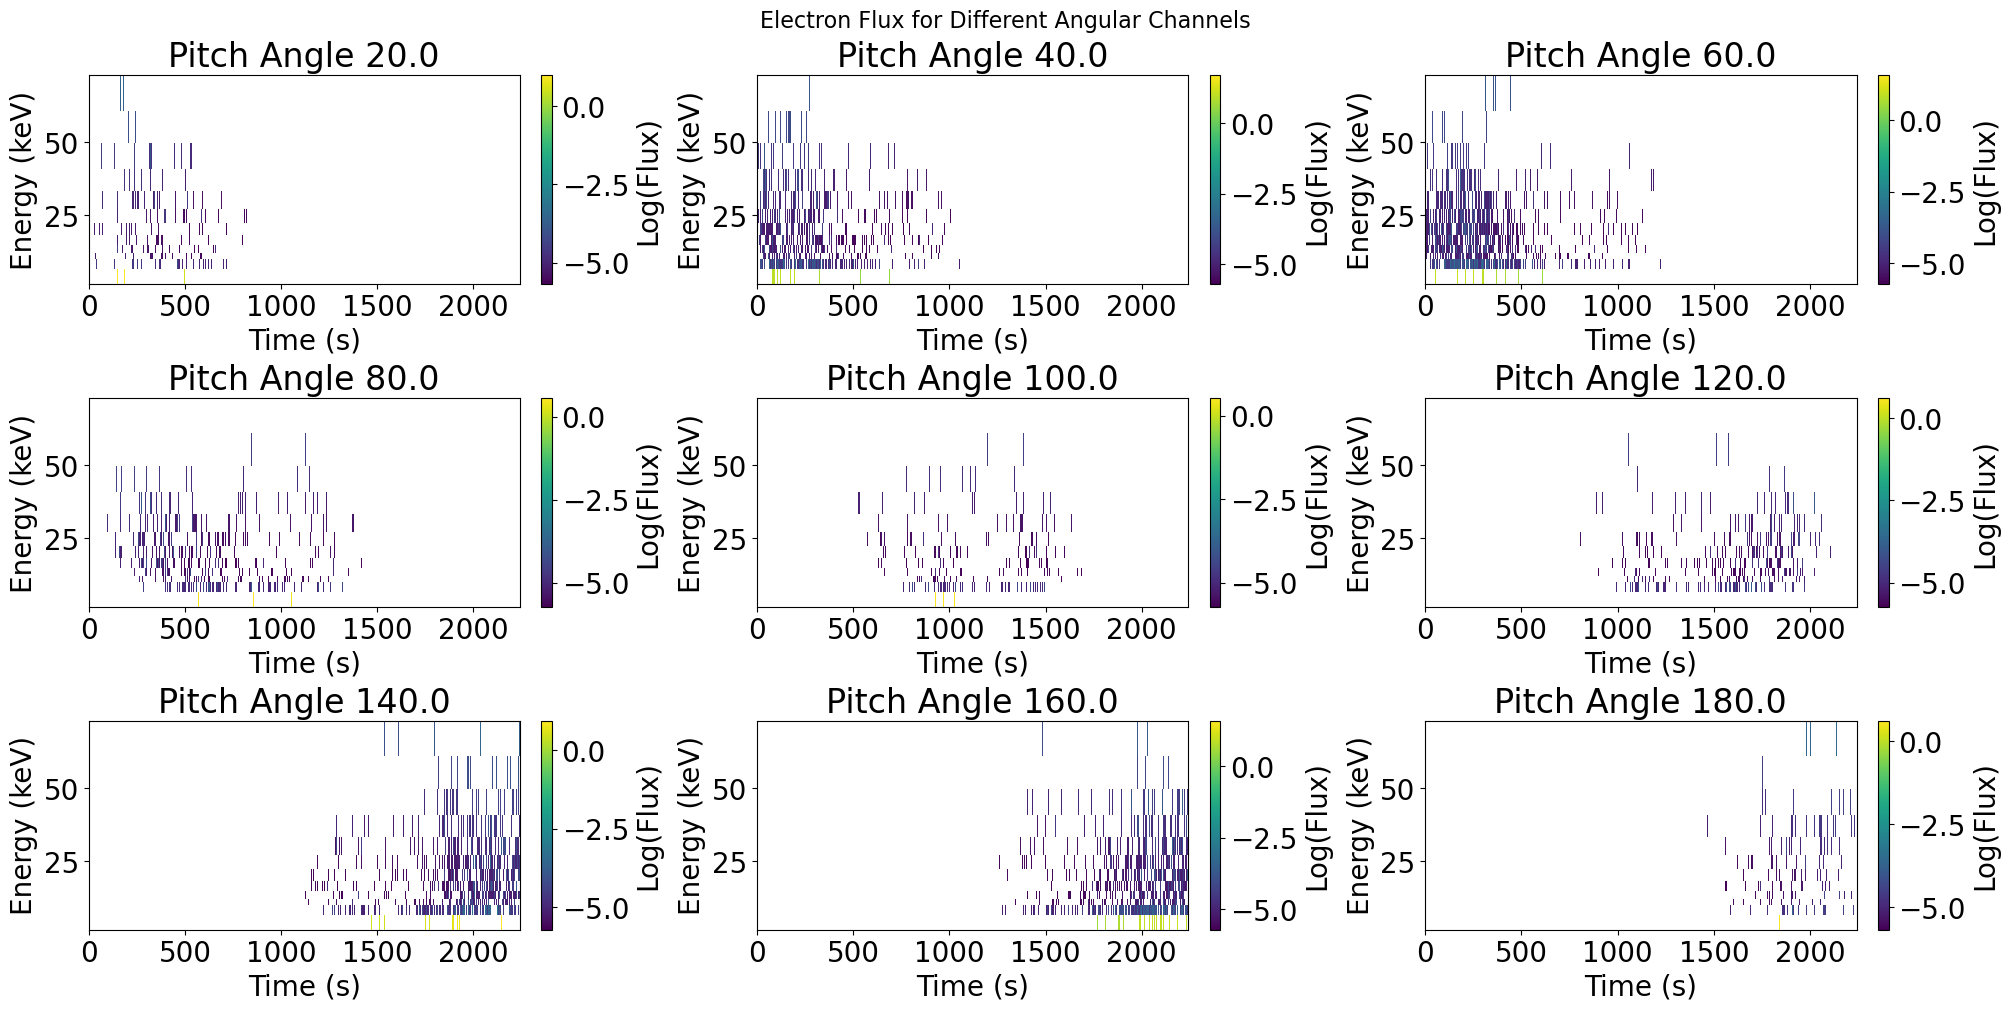

/var/folders/ty/5wkw7hms08s0_cpmqt9d44000000gn/T/ipykernel_28818/3835321944.py:72: RuntimeWarning: divide by zero encountered in log
  pcm = ax.pcolormesh(time_seconds, binning_prot_energy.flatten(), np.log(flux_prot_eneangle[:, :, i].T), shading='auto')


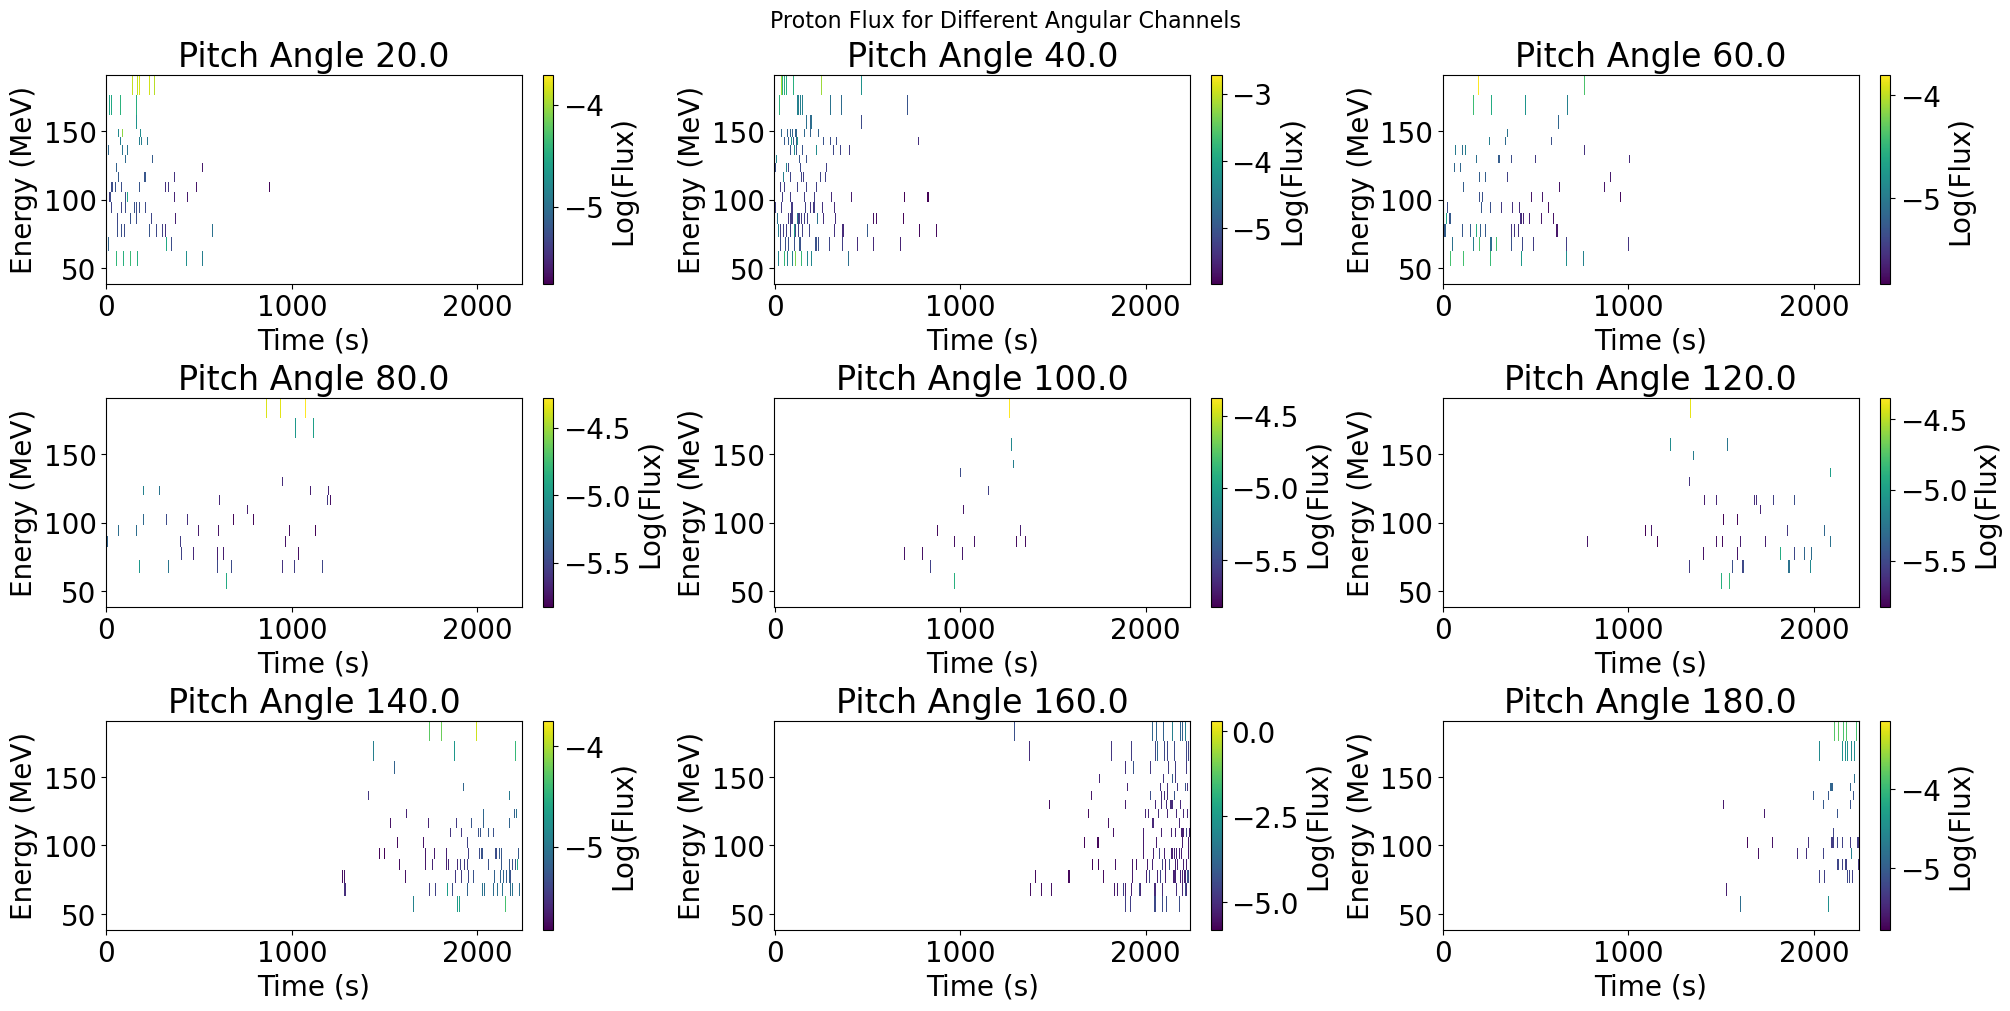

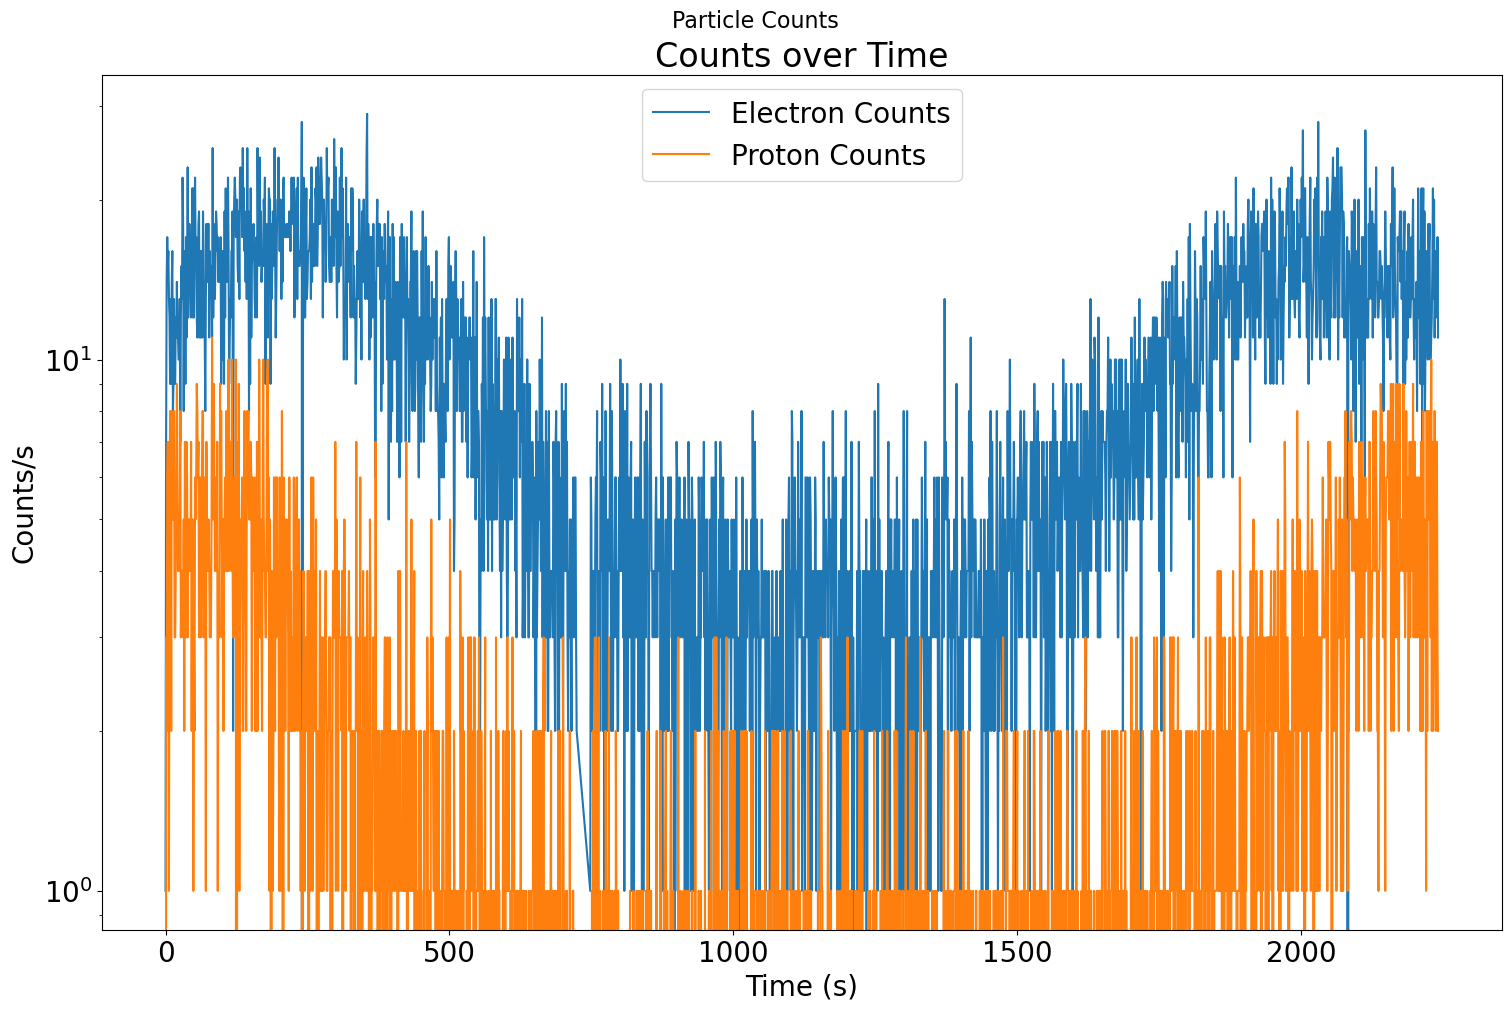

/var/folders/ty/5wkw7hms08s0_cpmqt9d44000000gn/T/ipykernel_28818/3835321944.py:94: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


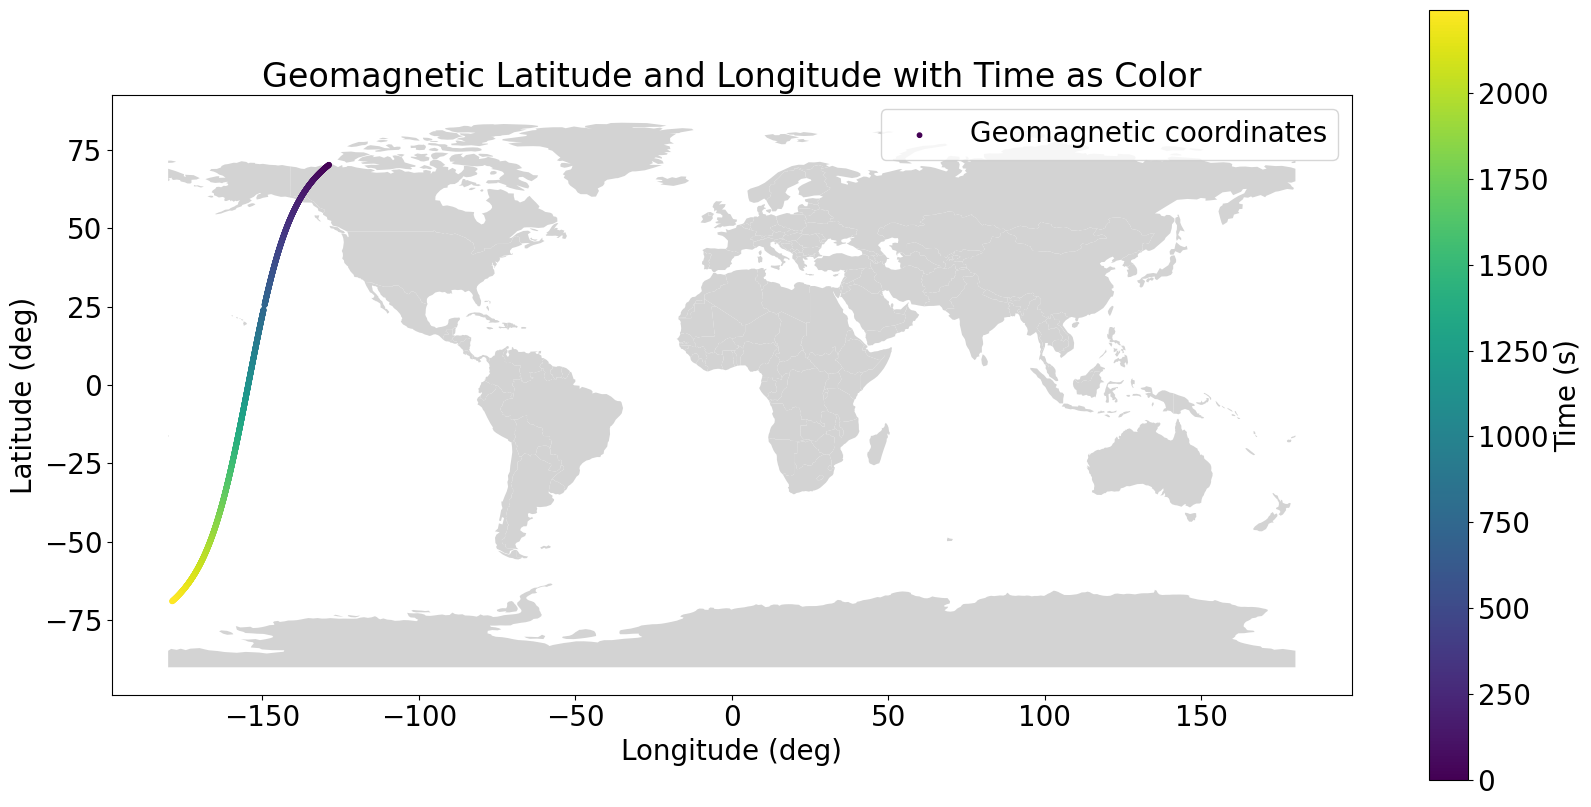

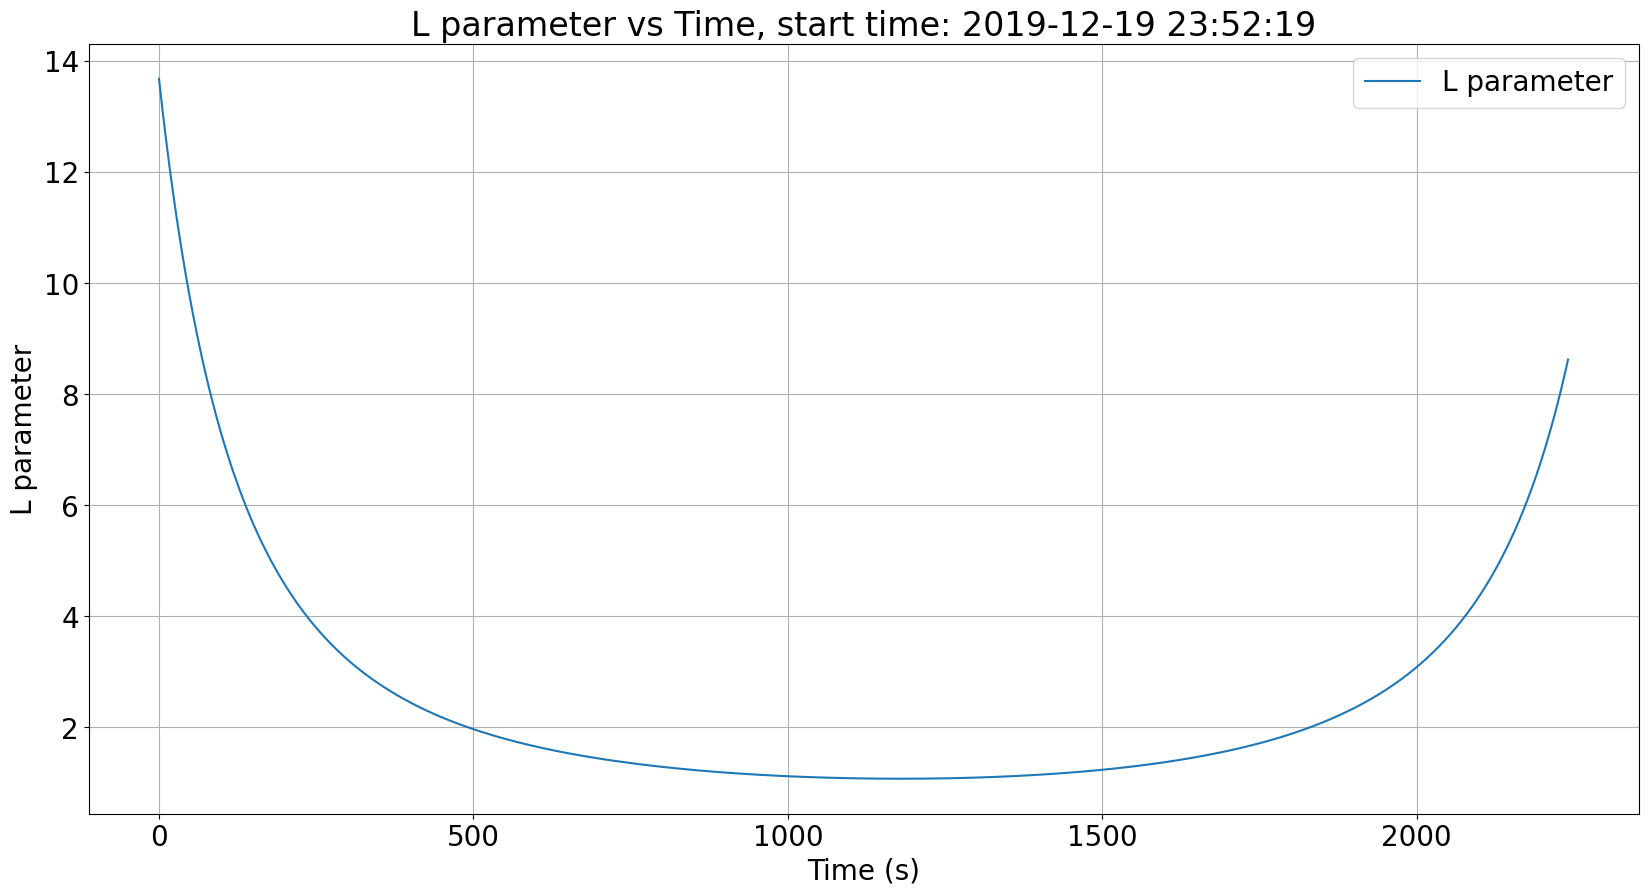

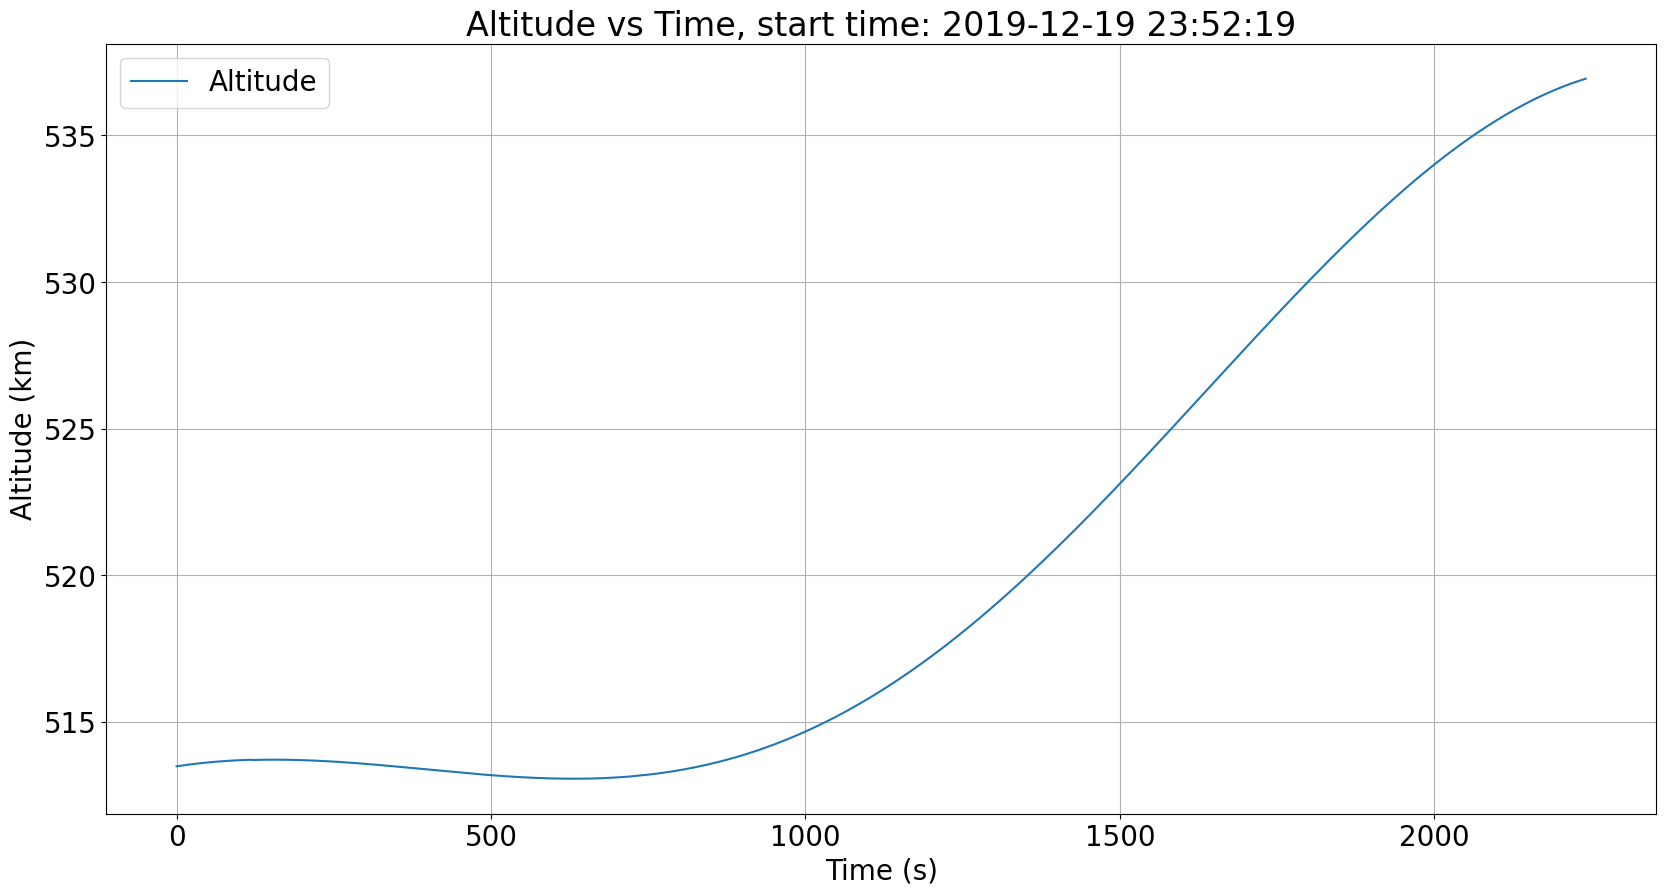

<KeysViewHDF5 ['Altitude', 'B', 'GMLonLat', 'HEPD_ele_counts', 'HEPD_ele_energy_pitch', 'HEPD_ele_energy_table', 'HEPD_ele_pitch_table', 'HEPD_pro_counts', 'HEPD_pro_energy_pitch', 'HEPD_pro_energy_table', 'HEPD_pro_pitch_table', 'L_parameter', 'LonLat', 'ProductAttributes', 'UTCTime']>
Flux ele shape:  (1745, 12, 9)
Flux prot shape:  (1745, 17, 9)
counts_ele shape:  (1745,)
counts_prot shape:  (1745,)
Time shape:  (1745,)
LonLat shape:  (1745, 2)
GMLonLat shape:  (1745, 2)
Altitude:  (1745,)
L shape:  (1745,)
Binning ele energy shape:  (1, 12)
Binning ele pitch shape:  (1, 9)
Binning prot energy shape:  (1, 17)
Binning prot pitch shape:  (1, 9)


/var/folders/ty/5wkw7hms08s0_cpmqt9d44000000gn/T/ipykernel_28818/3835321944.py:59: RuntimeWarning: divide by zero encountered in log
  pcm = ax.pcolormesh(time_seconds, binning_ele_energy.flatten(), np.log(flux_ele_eneangle[:, :, i].T), shading='auto')


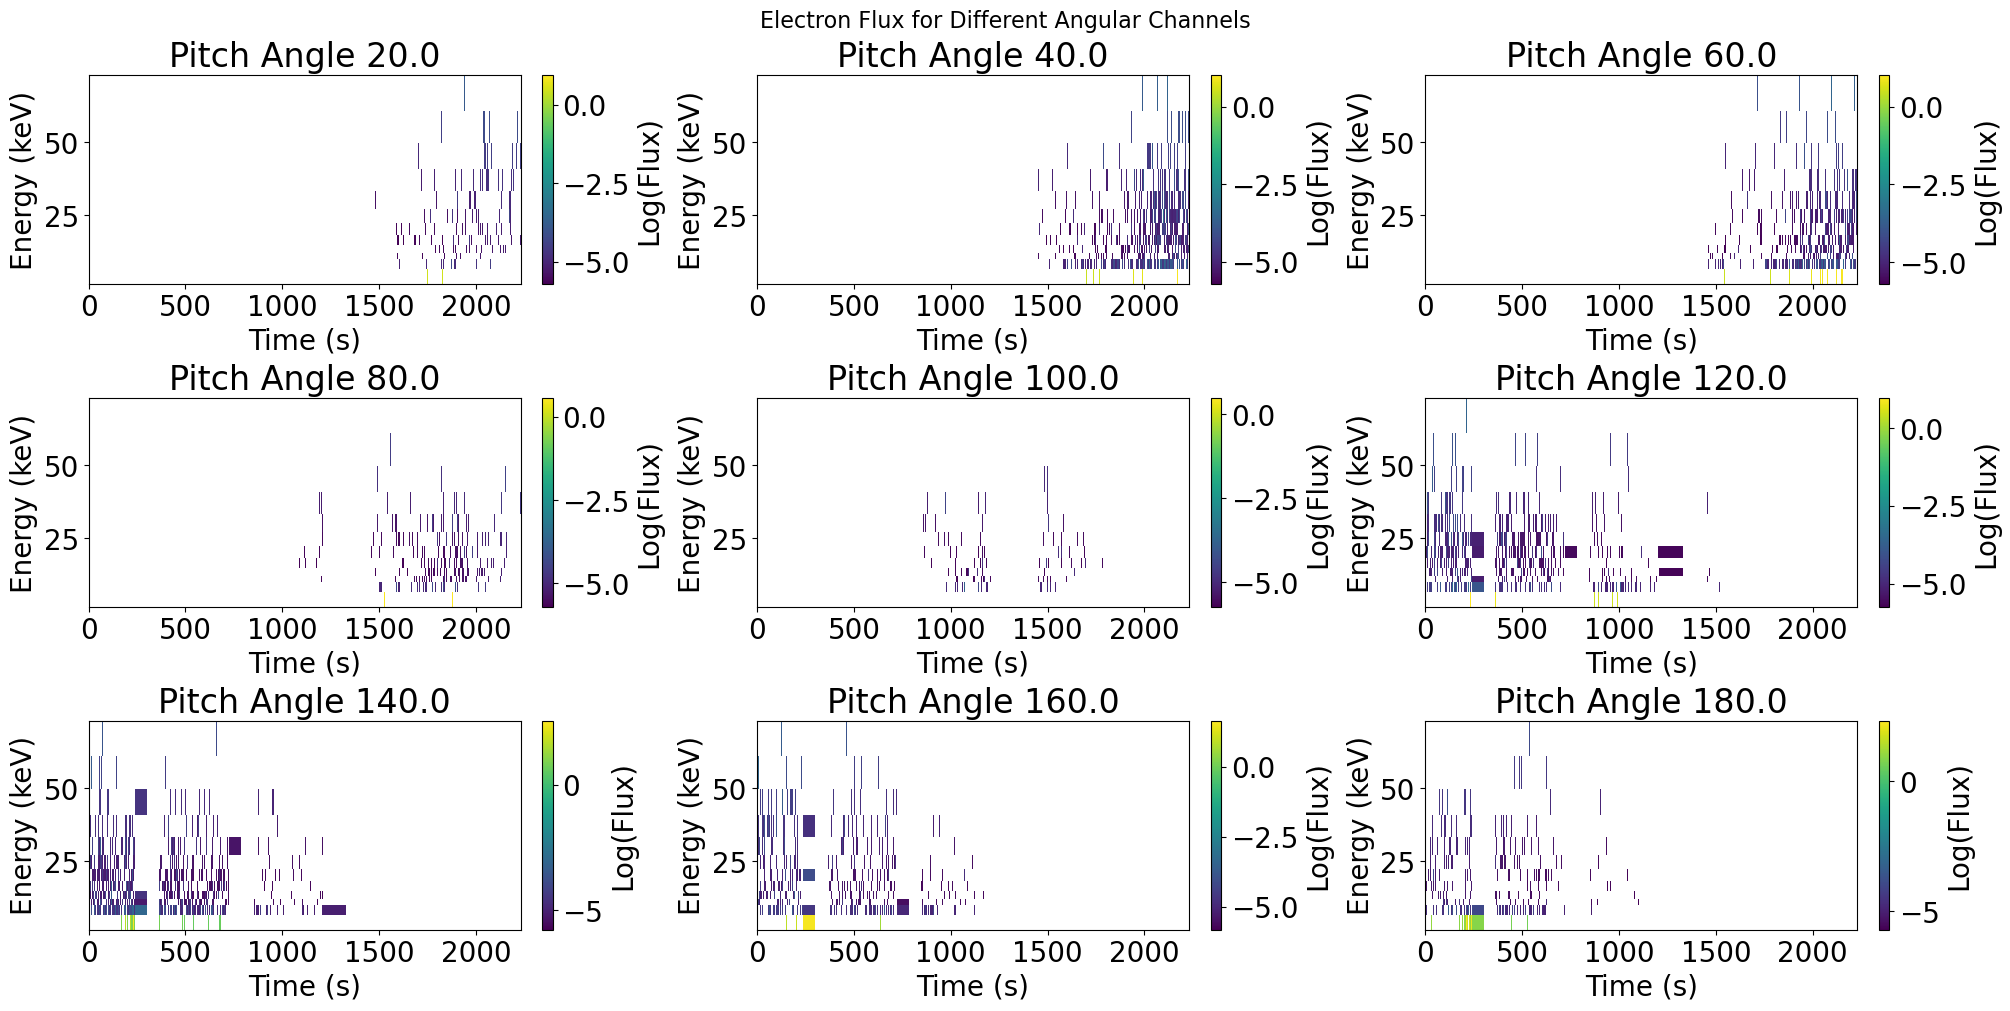

/var/folders/ty/5wkw7hms08s0_cpmqt9d44000000gn/T/ipykernel_28818/3835321944.py:72: RuntimeWarning: divide by zero encountered in log
  pcm = ax.pcolormesh(time_seconds, binning_prot_energy.flatten(), np.log(flux_prot_eneangle[:, :, i].T), shading='auto')


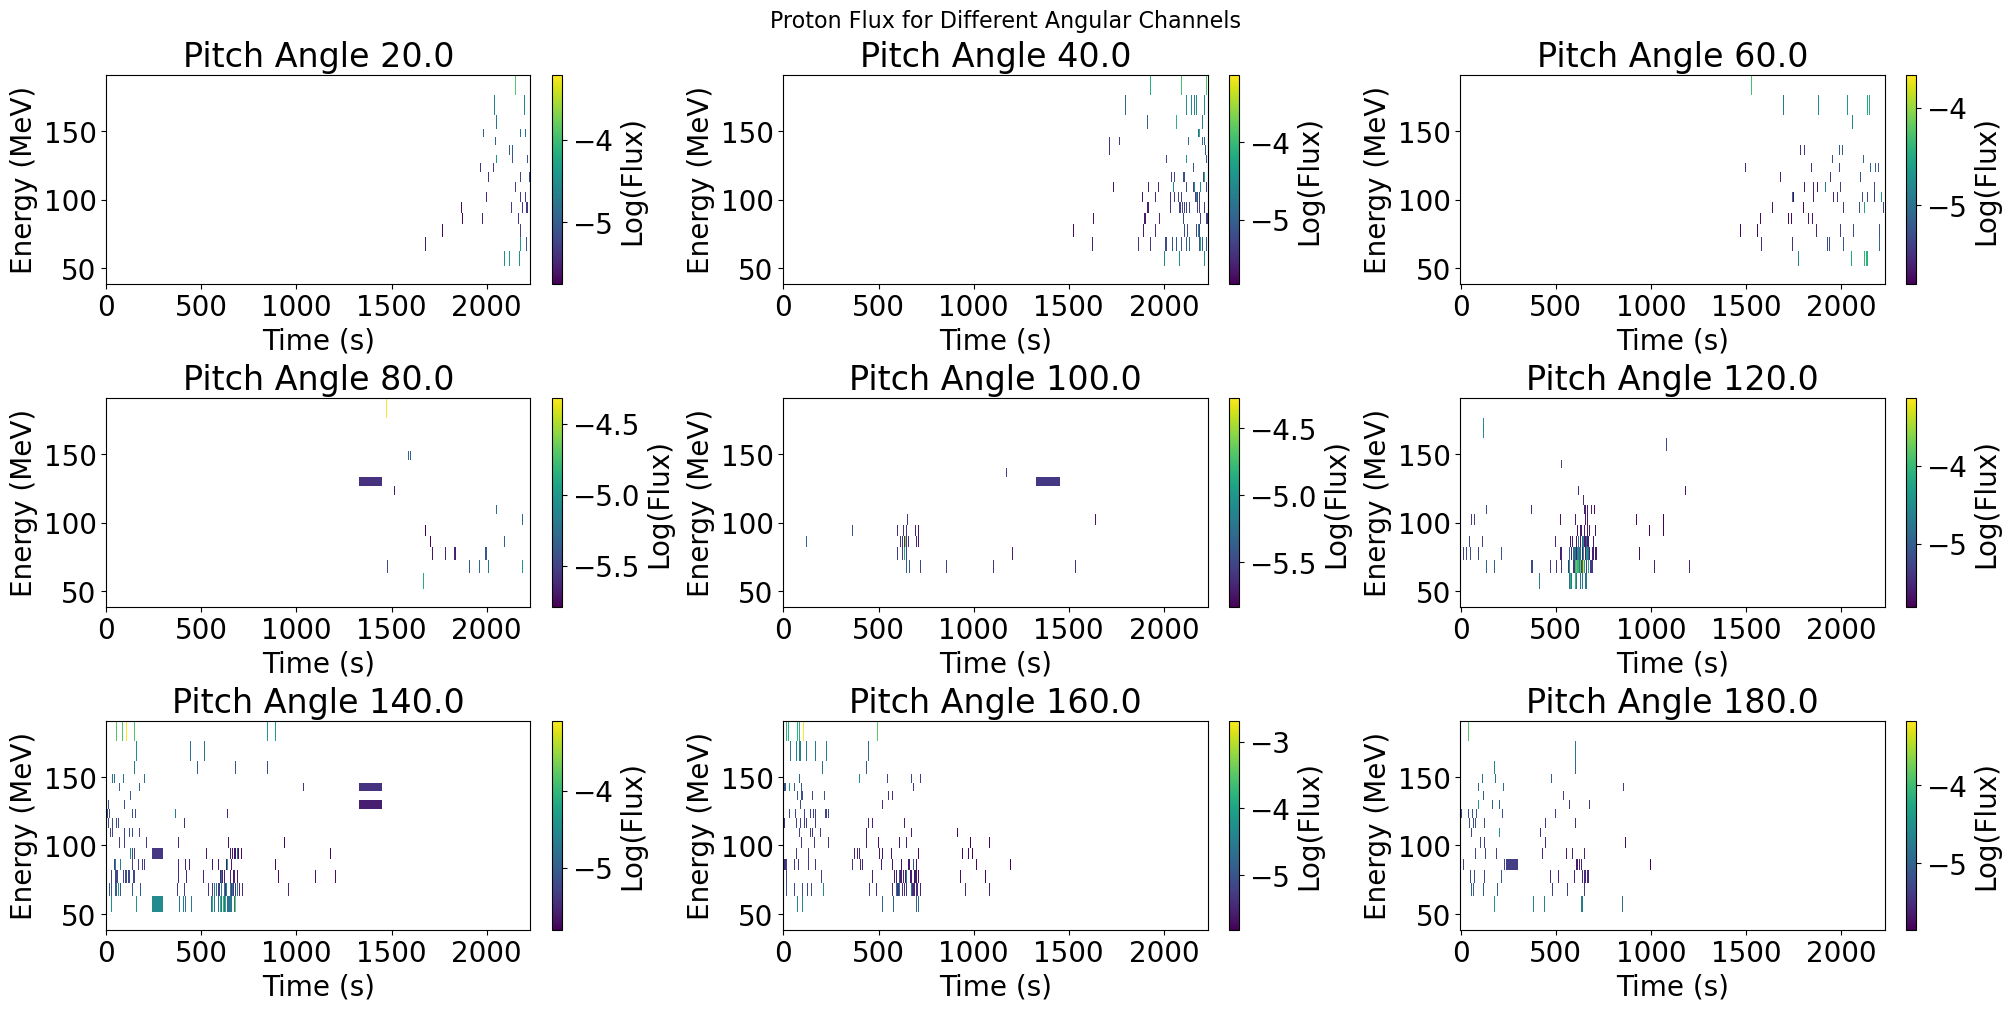

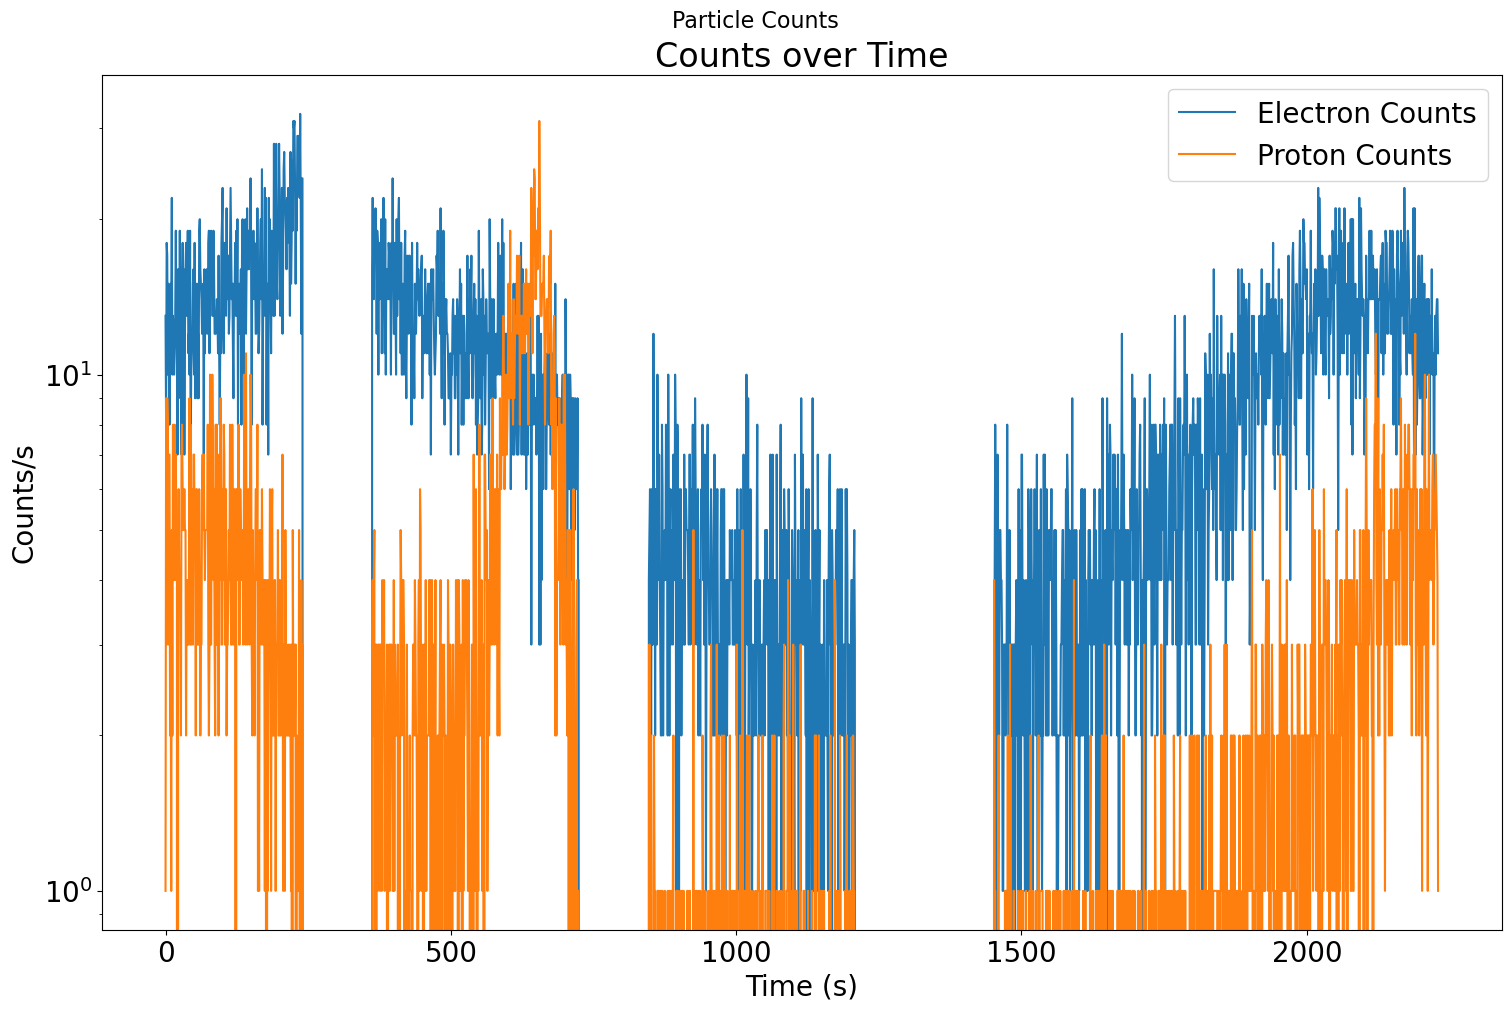

/var/folders/ty/5wkw7hms08s0_cpmqt9d44000000gn/T/ipykernel_28818/3835321944.py:94: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


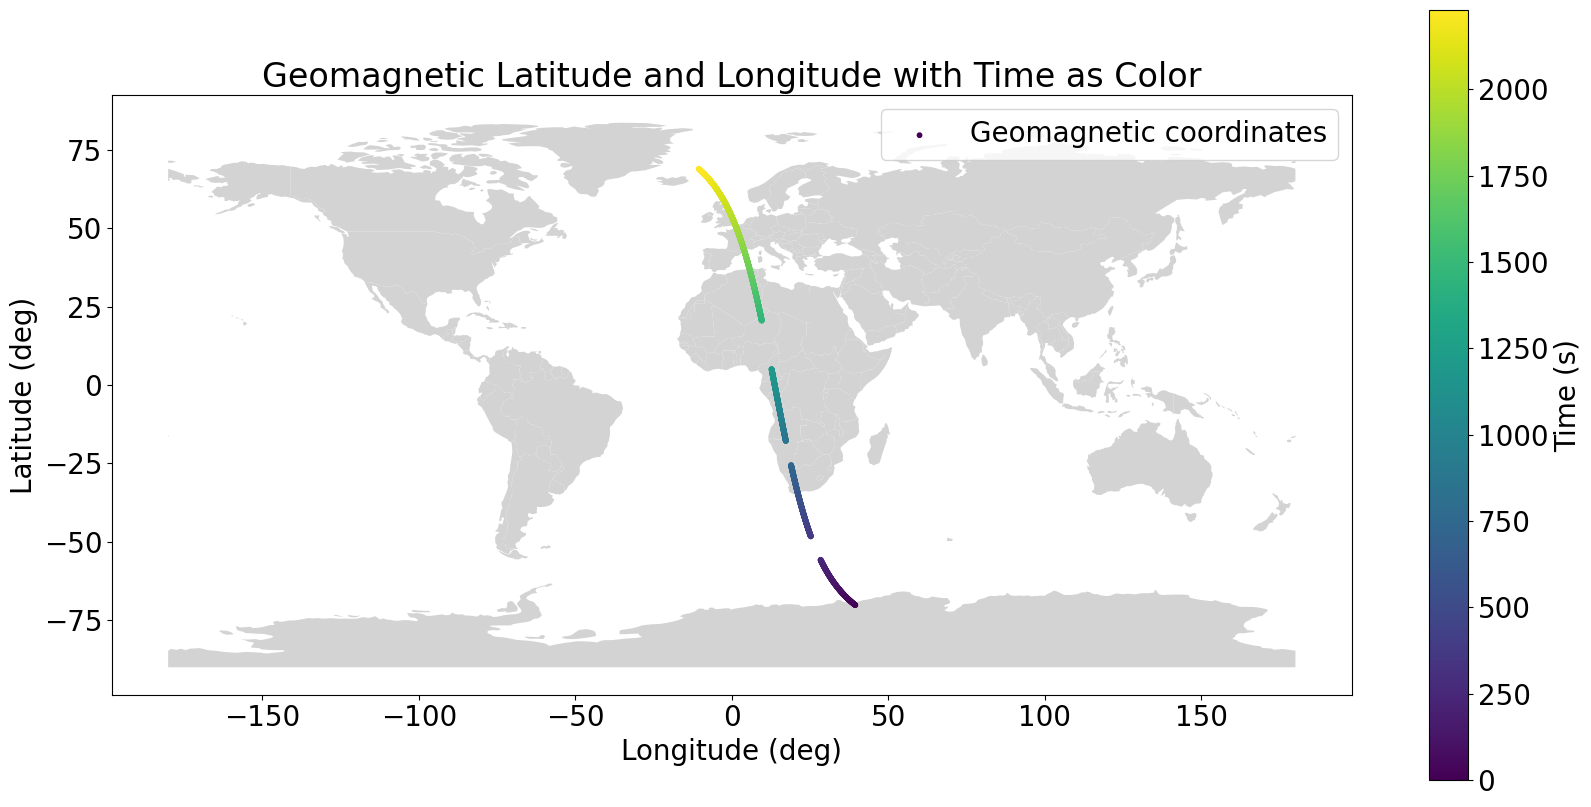

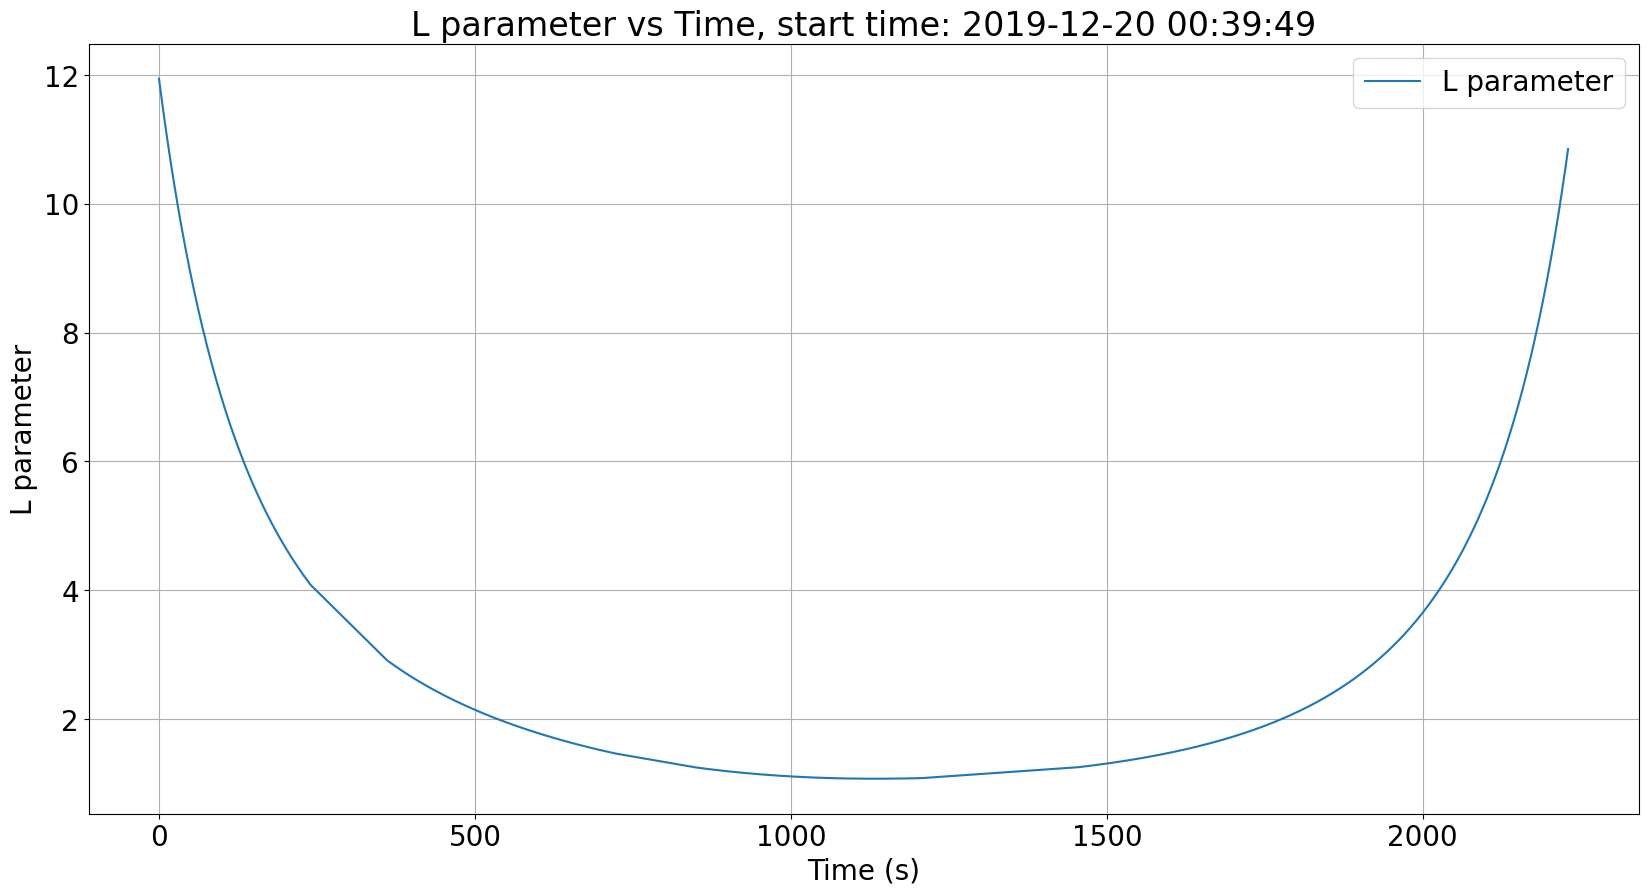

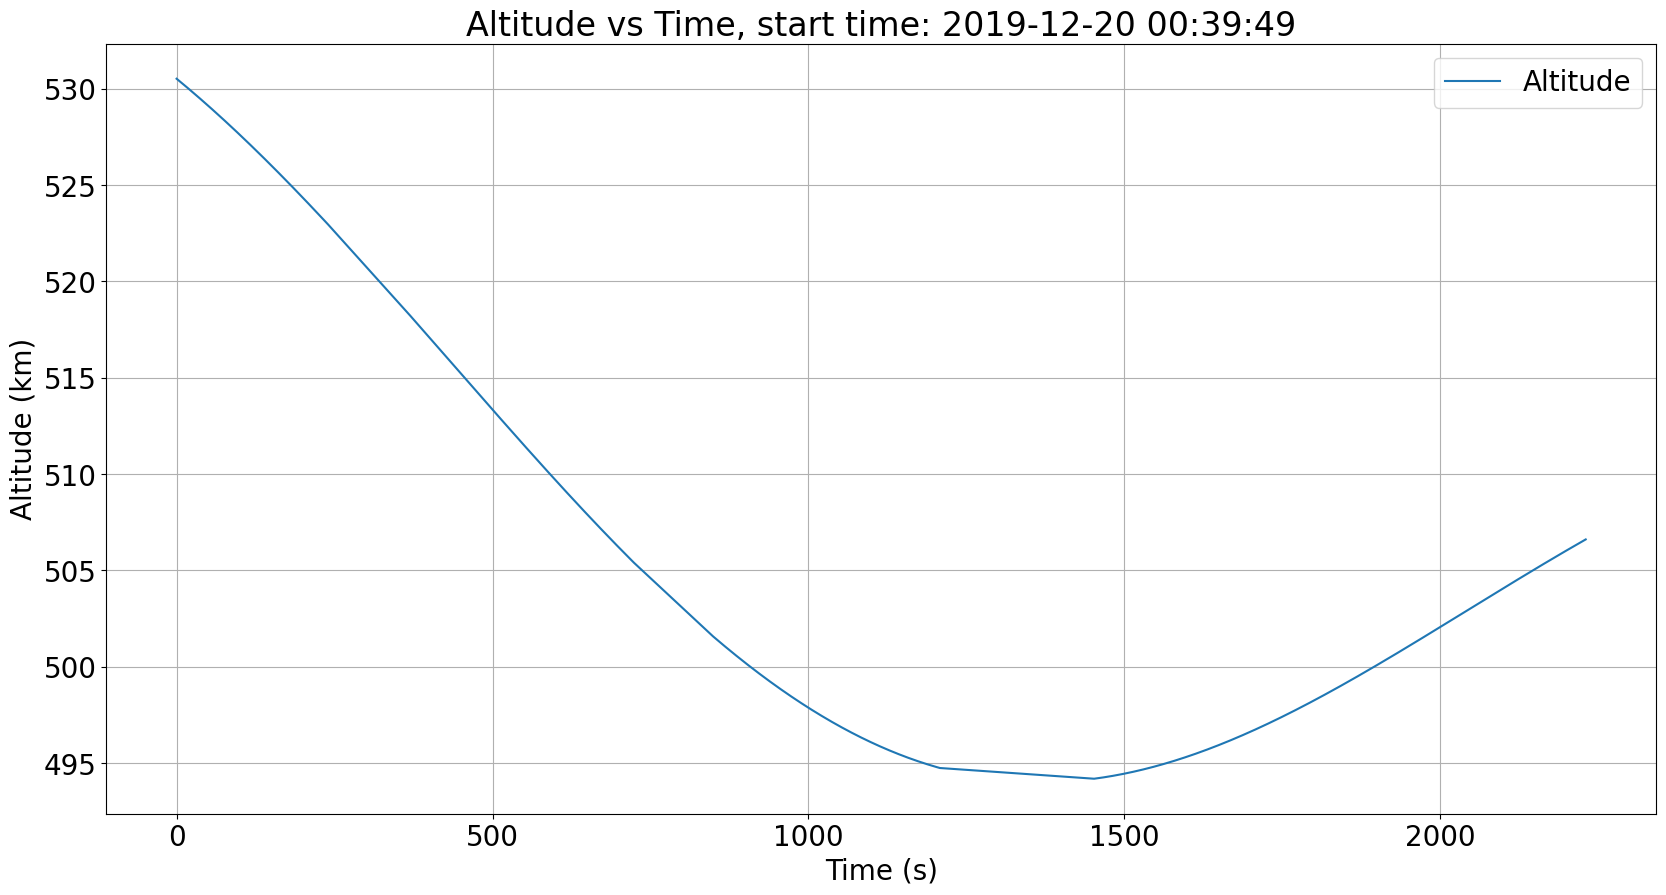

In [39]:
plt_h5_HEPD('./test_data_HEP_20201219/CSES_HEP_DDD_0104240_20191219_235216_20191220_002938_L3_0000122835.h5')
plt_h5_HEPD('./test_data_HEP_20201219/CSES_HEP_DDD_0104241_20191220_003945_20191220_011657_L3_0000122839.h5')